In [92]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pickle

In [94]:
with open('temperatures.dat', 'rb') as rfp:
    dataCeNTREX = pickle.load(rfp)

In [103]:
timestampsCeNTREX1 = np.array([dt.datetime.strptime(values[1], "%Y-%m-%d %H:%M:%S") for values in dataCeNTREX[1::2]])
timestampsCeNTREX2 = np.array([dt.datetime.strptime(values[1], "%Y-%m-%d %H:%M:%S") for values in dataCeNTREX[::2]])
temperatureCeNTREX1 = np.array([values[2] for values in dataCeNTREX[1::2]])
temperatureCeNTREX2 = np.array([values[2] for values in dataCeNTREX[::2]])

In [27]:
with open('Log4002Yocto_Temperature.tsv', 'r') as rfp:
    data = rfp.read()
    data = data.split('\n')[-86400:][:-1]
    data = [d.split('\t') for d in data]    

In [70]:
timestamps = np.array([dt.datetime.strptime(d[0]+" "+d[1], "%m/%d/%Y %I:%M:%S %p") for d in data])

temperatures = np.empty([len(data),3])
temperatures[:,0] = np.array([float(d[2]) for d in data])
temperatures[:,1] = np.array([float(d[5]) for d in data])
temperatures[:,2] = np.array([float(d[8]) for d in data])

pressures = np.empty([len(data),3])
pressures[:,0] = np.array([float(d[3]) for d in data])
pressures[:,1] = np.array([float(d[6]) for d in data])
pressures[:,2] = np.array([float(d[9]) for d in data])

humidities = np.empty([len(data),3])
humidities[:,0] = np.array([float(d[4]) for d in data])
humidities[:,1] = np.array([float(d[7]) for d in data])
humidities[:,2] = np.array([float(d[10]) for d in data])

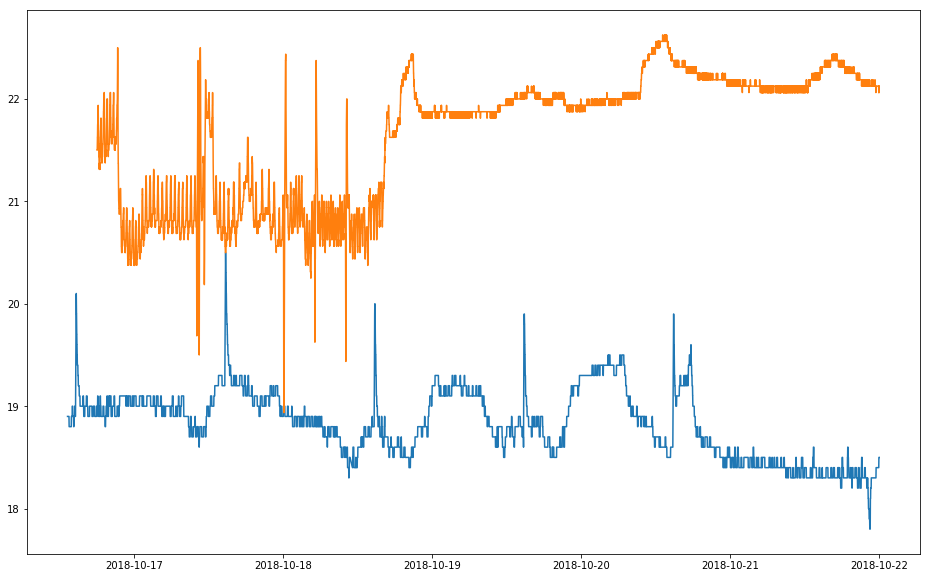

In [113]:
start, stop = dt.datetime(2018,10,16,13), dt.datetime(2018,10,21,23,59)
mask = (timestamps > start) & (timestamps < stop)
maskCeNTREX = (timestampsCeNTREX1 > start) & (timestampsCeNTREX1 < stop)
fig, ax = plt.subplots(figsize = (16,10))
ax.plot(timestamps[mask], temperatures[:,0][mask], label = 'SrF')
ax.plot(timestampsCeNTREX1[maskCeNTREX], temperatureCeNTREX1[maskCeNTREX], 'CeNTREX')